In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [8]:
def generate_noisy_line(length=10, num_points=100, noise_level=0.2):
    # x = np.linspace(0, length, num_points)
    # y = np.linspace(0, length, num_points)
    # y += np.random.normal(scale=noise_level, size=num_points)
    # return np.column_stack((x, y))
    # Generate base points
    x_base = np.linspace(0, length, num_points)
    y_base = np.linspace(0, length, num_points)

    # Add noise to base points
    y_base += np.random.normal(scale=noise_level, size=num_points)
    
    # Create a cubic spline interpolation of the noisy points
    cs = CubicSpline(x_base, y_base)
    
    # Generate smooth x values
    x_smooth = np.linspace(0, length, num_points * 10)
    
    # Generate smooth y values using the spline
    y_smooth = cs(x_smooth)
    
    return np.column_stack((x_smooth, y_smooth))

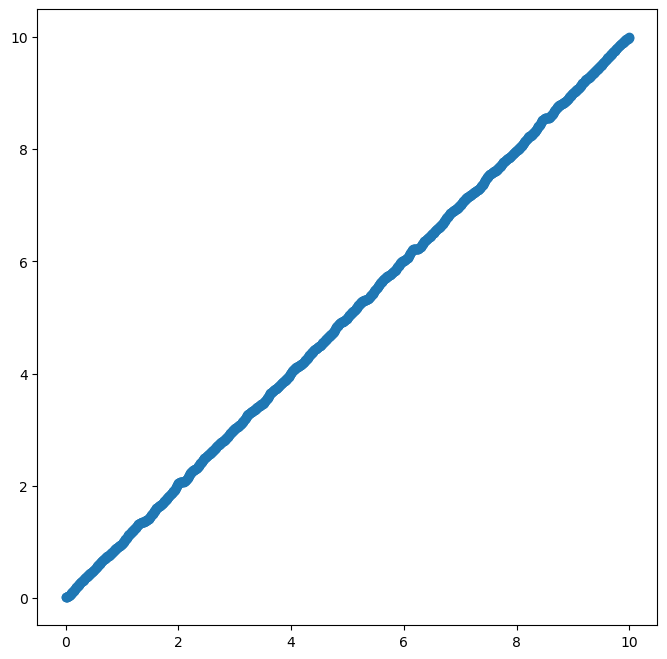

In [11]:
line_data = generate_noisy_line(10, 100, 0.02)
plt.figure(figsize=(8, 8))
plt.plot(line_data[:, 0], line_data[:, 1], 'o', label='Noisy Line')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Noisy Line Plot')
# plt.grid(True)
# plt.legend()
plt.show()

Line points have been saved to C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.csv


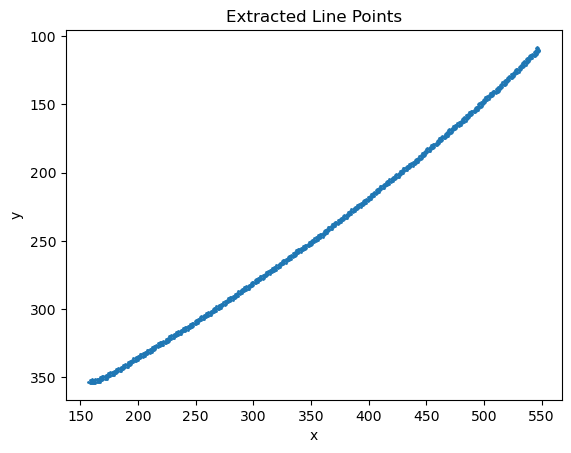

In [16]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt

def extract_line_points(image_path, csv_path='line_points.csv'):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if image is loaded successfully
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Threshold the image to get a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find the coordinates of the white pixels (the line)
    coordinates = np.column_stack(np.where(binary_image > 0))
    
    # Save the coordinates to a CSV file
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['x', 'y'])  # Header
        for coord in coordinates:
            writer.writerow(coord.tolist())
    
    print(f"Line points have been saved to {csv_path}")
    
    return coordinates

# Example usage
image_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.png"
csv_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.csv"  # Change this to your desired CSV output path
line_points = extract_line_points(image_path, csv_path)

# Visualize the points
plt.scatter(line_points[:, 1], line_points[:, 0], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Extracted Line Points')
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.show()
